In [ ]:
from gensim import corpora, models, similarities
from gensim.models import hdpmodel, ldamodel
from itertools import izip

documents = ["Human machine interface for lab abc computer applications",
              "A survey of user opinion of computer system response time",
              "The EPS user interface management system",
              "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

In [ ]:
# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]
texts

In [ ]:
sep = ' '
joined_emails = []
for email in texts:
    joined_emails.append(sep.join(email))
joined_emails

In [ ]:
# remove words that appear only once
all_tokens = sum(texts, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once]
         for text in texts]
texts

In [ ]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
dictionary
corpus

In [ ]:
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=50)
corpus_lda = lda[corpus]

for l,t in izip(corpus_lda,corpus):
    print l,"#",t
print

for top in lda.print_topics(10):
    print top

In [ ]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentence = "I am happy"
ss = sid.polarity_scores(sentence)
ss

{'compound': 0.5719, 'neg': 0.0, 'neu': 0.213, 'pos': 0.787}

{'compound': 0.5719, 'neg': 0.0, 'neu': 0.213, 'pos': 0.787}

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sentences=["hello","why is it not working?!"]
sid = SIA()
for sentence in sentences:
    ss = sid.polarity_scores(sentence) 

In [ ]:
from nltk.sentiment.util import *
sentence = "The movie was not good"
#demo_subjectivity()
#demo_liu_hu_lexicon(sentence)
demo_vader_instance(sentence)
#demo_sent_subjectivity(sentence)
#timer(demo_vader_instance(sentence))
something = {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}
type(something)

In [ ]:
%matplotlib inline
import seaborn as sns
import pandas as pd

countries_emotions = {
    'Morocco':1.5,
    'Guinea':2,
    'usa':3
}
countries_tracked = pd.DataFrame.from_dict(countries_emotions, orient='index')
countries_tracked.columns = ['Emotion Score']
palette = sns.color_palette("RdBu", n_colors=len(countries_tracked))
countries_tracked.plot(kind='bar', figsize=(14,4), color= palette)

In [ ]:
countries_tracked

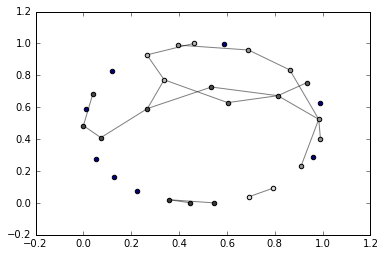

In [6]:
%matplotlib inline
import community
import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [7]:
G

In [ ]:
import networkx as nx
print nx.__version__
G = nx.complete_graph(4)
print nx.all_simple_paths(G, source=0, target=3, cutoff=2)

In [5]:
import pandas as pd
emails = pd.read_csv('hillary-clinton-emails/Emails.csv',encoding="utf-8")
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [8]:
emails.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [44]:
vertices = set(emails['MetadataFrom']).union(set(emails['MetadataFrom']))
len(vertices)

290

In [24]:
edges = []
for i in range(0,len(emails)):
    edges.append([emails.iloc[i]['MetadataFrom'],emails.iloc[i]['MetadataTo']])

In [30]:
len(edges)

7945

In [19]:
import networkx as nx
G=nx.Graph()

In [20]:
G.add_node(1)

In [26]:
for edge in edges:
    G.add_nodes_from(edge)

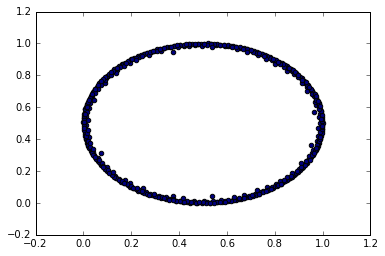

In [27]:
#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [48]:
len(set(partition.values())) #  is a dictionary where keys are their nodes and values the communities

472

In [47]:
#Print the most frequent 20 words used by the email authors of each community
for community in partition.values():
    print community

nan
1
2
3
sulllivanjj@state.gov
NEA/IPA:Knopf, Payton
Politico - Drew, Elizabeth
Crowley, Phillip J
Garten, David (Lautenberg)
Baer, Daniel B
Baer, Daniel D
SID
EAP/J:Green, Christopher
Richards, Cecile
Abedin, Huma
Cheryl Mills
Muscantine, LIssa
Crowley, Philip J
Chelsea
rrh.interiors
Jones, Paul W
Rice, Susan E.
SBerger
Hanley, Monica R
Daniel, Joshua J
verveerms@state.gov
Collier, Paul
wburns
kohhh@state.gov
AP
tauschereo@state.gov
lynn
Iscol, Zachary
H
Duk-soo, Han
Olver, John
Howe, Rosemarie
Sherman, Wendy R
Secretary
Inonye, Daniel
Jiloty, Lauren CD
Sherman, Wendy
carsonj@state.gov
Estados Unidos Da America
Bond, Michele T
Sullivan, Jacob
Tauscher, Ellen O
Quam, Lois
Cheryl Mills, COS
brimmere@state.gov
Laszczych, Joanne
JilotyLC@state.gov
Lissa, Muscatine
Shannon, Thomas A
Sandy
Hill
marshallcp@state.gov
Muscantine, Lissa
Jacobs, Janice L
Govenman Etazini
Obama, Barack
VerveerMS@state.gov
CrowleyPJ@state.gov
FINCA International
Pelton, E
Muscatine, Lisa
PRM/MCE:Wills, G
Clinton,